# Construcción de un modelo estadístico base

### Librerías Utilizadas

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqline
from scipy.stats import ttest_1samp
from sklearn.preprocessing import PowerTransformer
import statsmodels.formula.api as smf

### Importamos los datos

Las variables que se eligieron en la entrega anterior fueron: 

- carwidth
- wheelbase
- enginesize
- horsepower
- citympg
- peakrpm

El dataframe a continuación contará con dichas variables junto con 'Price'. La intención del modelo es poder predecir los valores de price utilizando una Regresión Lineal.

In [43]:
df = pd.read_csv('precios_autos-2.csv')
df = df.drop(['symboling','CarName','fueltype', 'carbody', 'compressionratio', 'drivewheel','enginelocation', 'cylindernumber','stroke','curbweight','enginetype','carheight','carlength','highwaympg'], axis=1)
df.head()

,wheelbase,carwidth,enginesize,horsepower,peakrpm,citympg,price
0,88.6,64.1,130,111,5000,21,13495.0
1,88.6,64.1,130,111,5000,21,16500.0
2,94.5,65.5,152,154,5000,19,16500.0
3,99.8,66.2,109,102,5500,24,13950.0
4,99.4,66.4,136,115,5500,18,17450.0


Ahora se normalizarán los datos con la intención de hacer una regresión. Esto debido a que en la entrega anterior claramente se veía en la matriz de dispersión que había mucho ruido en los datos, por lo que se optó por normalizarlos para reducir dicho ruido.

In [44]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
datos = power.fit_transform(df)
datos = pd.DataFrame(datos, columns=['carwidth', 'enginesize', 'horsepower', 'wheelbase', 'citympg', 'peakrpm', 'price'])

datos.head()

,carwidth,enginesize,horsepower,wheelbase,citympg,peakrpm,price
0,-2.402418,-6.661338e-16,0.380332,0.466122,-0.251058,-0.586744,0.468027
1,-2.402418,-6.661338e-16,0.380332,0.466122,-0.251058,-0.586744,0.826806
2,-0.699849,-2.775558e-17,0.890484,1.286257,-0.251058,-0.977418,0.826806
3,0.365001,2.220446e-16,-0.294503,0.226519,0.792334,-0.065280,0.530368
4,0.296266,3.053113e-16,0.535529,0.562854,0.792334,-1.188336,0.918904


### Matriz de dispersión

En el documento entregado anteriormente se mostraron cada uno de los datos que son atípicos del dataframe. Ahora, se volverán a mostrar pero utilizando una matriz de dispersión.

In [45]:
fig = px.scatter_matrix(datos, width=1300, height=1500)
fig.update_layout({"xaxis"+str(i+1): dict(tickangle = -90) for i in range(13)})
fig.update_traces(diagonal_visible=False)
fig.show()

Observamos que la mayoría de los datos siguen una regresión lineal entre ellos, con excepción de citympg ya que tiene un comportamiento un poco extraño. Igualmente, observamos que para el grán número de datos (205 datos), la mayoría no cuenta con una cantidad significante de valores atípicos, por lo que no se eliminarán para la primera modelación y, en caso de ser necesario, se eliminarán y se volverá a modelar los datos sin estos valores atípicos.

### Regresión Lineal Múltiple

La razón por la que se eligió la regresión lineal es porque en la Matriz de Dispersión anterior se puede observar como los datos en su mayoría siguen una tendencia lineal, por lo que se quiere verificar si este es el caso. Para esto, se hará la implementación del modelo y después se hará una verificación del modelo.

In [46]:
# descripción de los datos

datos.describe()

,carwidth,enginesize,horsepower,wheelbase,citympg,peakrpm,price
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,0.000014,1.340391e-17,-6.809079e-14,4.570869e-15,-1.109140e-15,7.332888e-16,-2.752053e-14
std,1.002448,7.760601e-16,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00
min,-3.151516,-3.080869e-15,-3.524894e+00,-2.542589e+00,-2.092800e+00,-2.453799e+00,-2.068027e+00
25%,-0.699849,-6.661338e-16,-8.083325e-01,-1.001606e+00,-6.762351e-01,-9.774182e-01,-7.792298e-01
50%,-0.153578,-2.775558e-17,8.787306e-02,1.537342e-02,1.695401e-01,-6.527978e-02,-9.242221e-02
75%,0.773509,4.718448e-16,6.549486e-01,5.861970e-01,7.923345e-01,8.057295e-01,8.271105e-01
max,2.442849,1.831868e-15,2.521759e+00,2.463899e+00,3.002130e+00,2.712571e+00,2.080857e+00


In [47]:
X = datos.drop(columns=['price'])
y = datos['price']


# crear las variables de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
# crear el modelo

model = LinearRegression()
model.fit(X_train,y_train) 

LinearRegression()

In [49]:
# predecir los valores de price

predictions = model.predict(X_test)

In [50]:
# imprimimos los valores de los coeficientes

print('Beta_0 = ', model.intercept_)
print('Beta_1 = ', model.coef_[0])
print('Beta_2 = ', model.coef_[1])
print('Beta_3 = ', model.coef_[2])
print('Beta_4 = ', model.coef_[3])
print('Beta_5 = ', model.coef_[4])
print('Beta_6 = ', model.coef_[5])

Beta_0 =  0.027010063965261094
Beta_1 =  0.20680301531807949
Beta_2 =  1.1102230246251565e-16
Beta_3 =  0.21894769808363093
Beta_4 =  0.37329554499950296
Beta_5 =  -0.01840439985613875
Beta_6 =  -0.22373050647466178


Con los resultados arrojados anteriormente, observamos que la regresión está descrita por la ecuación $y = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_6  x_6$ donde los valores de $\beta$ son:

- $\beta_0$ = 0.02701
- $\beta_1$ = 0.20680
- $\beta_2$ = 1.11022e-16
- $\beta_3$ = 0.21894
- $\beta_4$ = 0.37329
- $\beta_5$ = -0.01840
- $\beta_6$ = -0.22373

y los valores de $x_k$ representan los valores de:

- $x_1$ = carwidth
- $x_2$ = enginesize
- $x_3$ = horsepower
- $x_4$ = wheelbase
- $x_5$ = citympg
- $x_6$ = peakrpm

In [51]:
# imprimir los valores de los errores

print('Error Medio Cuadrado: ', mean_squared_error(y_test, predictions))
print('Error Medio Absoluto: ', mean_absolute_error(y_test, predictions))
print('Coeficiente de Pearson: ', r2_score(list(y_test), list(predictions)))

Error Medio Cuadrado:  0.19998759890178464
Error Medio Absoluto:  0.3455852825911986
Coeficiente de Pearson:  0.8246132533448255


Como observamos, obtenemos valores de error muy pequeños al igual que un valor del Coeficientge de Pearson muy alto, siendo este 82.46%. Esto confirma que el modelo creado tiene correlación con la variable de 'precio'. Para poder entender mejor el resultado, lo ideal sería graficar todos los datos junto con la regresión y la variable 'precio', sin embargo, se necesitaría hacer una gráfica con almenos 6 dimensiones o un PCA para poder mostrarlo en máximo 3 dimensiones. Por otro lado, para validar el modelo, podemos basarnos en los Errores Medio, tanto en el Cuadrado como en el Absoluto. Podemos observar que ambos errores son pequeños, sin embargo, no son insignificantes por los valores de 'price' ya normalizados. Es por esto que se sabe que aún se puede mejorar el modelo al actualizar los hiperparámetros y encontrar los valores óptimos para el sistema.

In [61]:
model = smf.ols("price ~ carwidth + enginesize + horsepower + citympg + peakrpm + wheelbase", data= datos).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     172.5
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           2.53e-70
Time:                        17:28:32   Log-Likelihood:                -119.28
No. Observations:                 205   AIC:                             250.6
Df Residuals:                     199   BIC:                             270.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.591e-06      0.031  -8.44e-05      1.000      -0.061       0.061
carwidth       0.1909      0.040      4.763      0.000       0.112       0.270
enginesize   2.98e-16   4.11e-17      7.256      0.000    2.17e-16    3.79e-16
horsepower     0.2407      0.068      3.529      0.001       0.106       0.375
citympg       -0.0273      0.043     -0.642      0.522      -0.111       0.057
peakrpm       -0.2703      0.076     -3.543      0.000      -0.421      -0.120
wheelbase      0.3305      0.097      3.390      0.001       0.138       0.523
==============================================================================
Omnibus:                        1.658   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.685
Skew:                           0.214   Prob(JB):                        0.431
Kurtosis:                       2.880   Cond. No.                     4.51e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  3e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observamos que todas las variables son significativas con excepción de citympg. Se optó por mantener la variable ya que al momento de cambiar variables el modelo empeoraba al igual que hacía que otras variables no sigan siendo significativas, por lo que se mantuvo dicha variable para también cumplir con el requerimiento de tener almenos 6 variables en el modelo.

### Normalidad de Residuos

Por último, se buscará encontrar si las variables son independientes al igual que encontrar si las varianzas son constantes en los datos. Para esto, se debe buscar encontrar si los residuos se tienen un comportamiento normal al igual que si presentan algún sesgo u homocedasticidad. Con esto en mente, para encontrar si los residuos siguen una normal, se debe de hacer la siguiente prueba de hipótesis:

- $H_0$: Los datos provienen de una población normal. $\mu_e = 0$

- $H_1$: Los datos no provienen de una población normal. $\mu_e \neq 0$

- $\alpha$ = 0.05

In [53]:
resultados = pd.DataFrame()
resultados['predicted'] = list(predictions)
resultados['actual'] = list(y_test)
resultados['residual'] = resultados['predicted'] - resultados['actual']
resultados = resultados.sort_values(by='residual').reset_index(drop=True)
resultados.describe()

,predicted,actual,residual
count,62.000000,62.000000,62.000000
mean,-0.140929,-0.230246,0.089317
std,0.961650,1.076550,0.441767
min,-2.775327,-2.045627,-1.143647
25%,-0.995696,-1.065601,-0.169058
50%,-0.165693,-0.436774,0.083355
75%,0.558305,0.766223,0.371108
max,2.069482,2.080857,1.031006


<Axes: xlabel='residual', ylabel='Count'>

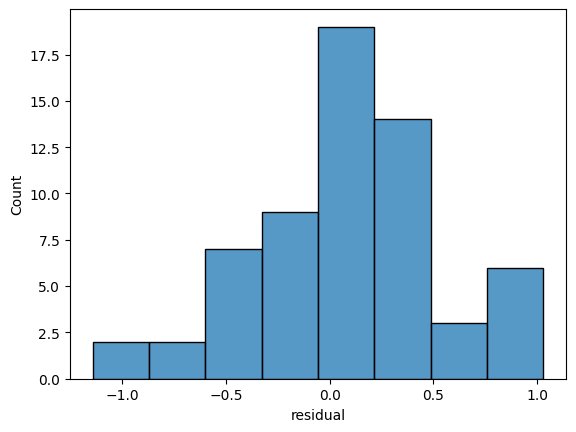

In [54]:
#histograma de residuos

sns.histplot(data=resultados['residual'])

<Axes: xlabel='residual', ylabel='Density'>

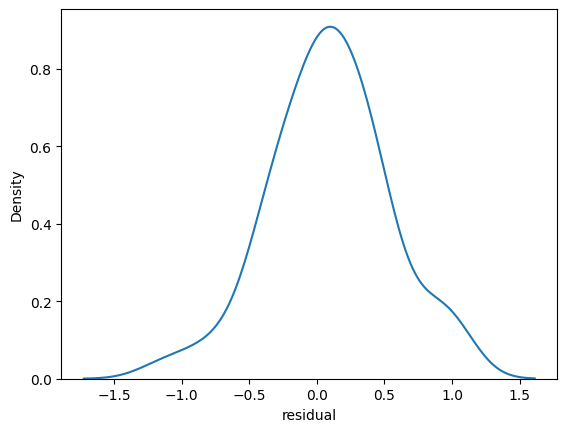

In [55]:
# Densidad de residuos

sns.kdeplot(data=resultados['residual'])

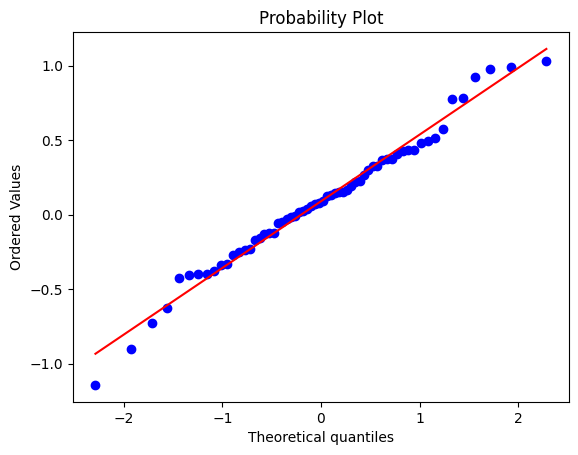

In [56]:
stats.probplot(resultados['residual'], dist="norm", plot=plt)
py.show()

In [57]:
anderson(resultados['residual'])

AndersonResult(statistic=0.283038814525959, critical_values=array([0.544, 0.62 , 0.744, 0.868, 1.032]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.08931675058151359, scale=0.4417667074405614)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Observando las gráficas y el valor-p encontrado con la prueba Anderson-Darling, encontramos que la $H_0$ no se rechaza ya que el valor del estadístico de prueba (0.2830) es menor que el valor crítico para $\alpha = 0.05$ el cual es 0.744. De todos modos, se harán las otras pruebas para seguir mostrando que la $H_0$ no debe ser rechazada.

In [58]:
from statsmodels.stats import weightstats as stests

ztest ,propability_value = stests.ztest(resultados['residual'], x2=None, value=0)
print('valor p: ', float(propability_value))
if propability_value<0.05:
    print("Se rechaza la H0")
else:
    print("No se rechaza la H0")

valor p:  0.11139070687056588
No se rechaza la H0


Haciendo una prueba estadística de Z, vemos que el valor-p de los residuos es mayor que el del nivel de significancia. Por esto mismo, no se rechaza $H_0$, indicandonos que los residuos siguen una media de $\mu_e = 0$.

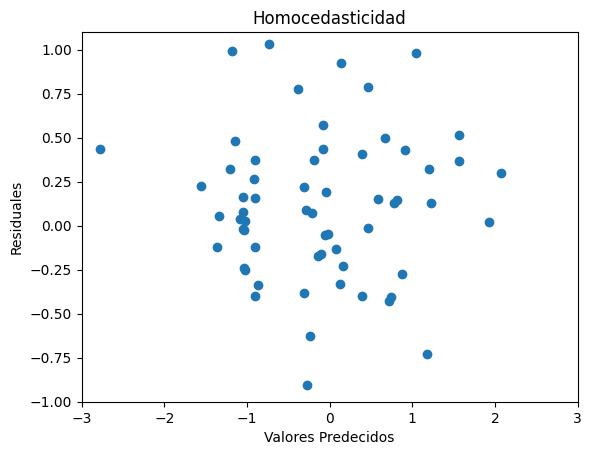

In [60]:
p = plt.scatter(predictions, resultados['residual'])
plt.xlabel('Valores Predecidos')
plt.ylabel('Residuales')
plt.ylim(-1,1.1)
plt.xlim(-3,3)
p = plt.title('Homocedasticidad')

Observando la gráfica anterior, vemos que no hay un sesgo en los datos, por lo que se concluye que son independientes. Igualmente, vemos que no hay variación en la separación de los datos con la media ($\mu_e = 0$) por lo que concluimos que no hay homocedasticidad en los datos.

### Conclusión

Recopilando todo, encontramos un modelo de regresión lineal para las variables de carwidth, enginesize, horsepower, citympg, peakrpm y wheelbase en relación a la variable price. Esto dio buenos resultados al obtener una correlación de 82.46% y un error relativamente pequeño. Para poder seguir analizando el modelo, se hizo una prueba de hipótesis para los valores de los residuos para encontrar si las variables son independientes o dependientes, con lo cual se encontró que efectivamente eran independientes. Con esto, encontramos un modelo que es muy bueno para la estimación de precio bajo las variables que se mencionaron anteriormente, sin embargo, siempre hay espacio para mejorar al buscar hiperparámetros más eficientes y óptimos al seguir entrenando el modelo con nuevos valores o con una base de datos mayor. 